<a href="https://colab.research.google.com/github/pratik-chakraborty10/ML_Projects/blob/main/Cats_VS_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 237MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator

In [6]:
#generators
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
cnn=tf.keras.models.Sequential() #initialising the cnn model

In [8]:
#convolution
#this line of code creates the first convolutional layer of a CNN model, which takes images of size 64x64 pixels with 3 color channels as input, applies 32 filters of size 3x3 using the ReLU activation function.
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
#pooling
#a stride of 2 means the pooling window moves by 2 pixels at a time.
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
#adding 2nd convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [12]:
#Full connection
#tf.keras.layers.Dense: This creates a fully connected layer. Each neuron in a dense layer is connected to every neuron in the previous layer.
#units=128: This parameter specifies the number of neurons (or units) in the dense layer. In this case, there are 128 neurons.
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
#compile our CNN

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
#Training the CNN on the Training set and evaluating it on the Test set

cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
625/625 [==============================] - 67s 99ms/step - loss: 0.6402 - accuracy: 0.6324 - val_loss: 0.5510 - val_accuracy: 0.7196
Epoch 2/25
625/625 [==============================] - 58s 93ms/step - loss: 0.5445 - accuracy: 0.7214 - val_loss: 0.4933 - val_accuracy: 0.7694
Epoch 3/25
625/625 [==============================] - 58s 92ms/step - loss: 0.4967 - accuracy: 0.7576 - val_loss: 0.4821 - val_accuracy: 0.7664
Epoch 4/25
625/625 [==============================] - 58s 93ms/step - loss: 0.4675 - accuracy: 0.7789 - val_loss: 0.4688 - val_accuracy: 0.7772
Epoch 5/25
625/625 [==============================] - 58s 93ms/step - loss: 0.4490 - accuracy: 0.7887 - val_loss: 0.4320 - val_accuracy: 0.8032
Epoch 6/25
625/625 [==============================] - 57s 92ms/step - loss: 0.4248 - accuracy: 0.8047 - val_loss: 0.4158 - val_accuracy: 0.8126
Epoch 7/25
625/625 [==============================] - 58s 93ms/step - loss: 0.4153 - accuracy: 0.8108 - val_loss: 0.4134 - val_accuracy:

In [16]:
import cv2

In [32]:
test_img=cv2.imread('/content/dog.jpeg')


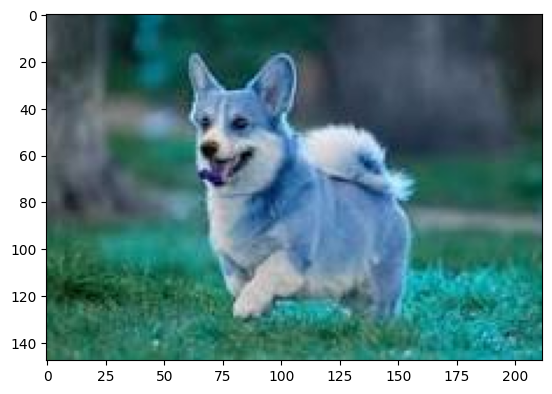

In [33]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [34]:
test_image=cv2.resize(test_img,(64,64))

In [35]:
test_input=test_image.reshape((1,64,64,3))

In [36]:
cnn.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [37]:
#single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/cat.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 63ms/step


In [38]:
print(prediction)

cat
